<a href="https://colab.research.google.com/github/magomeda228/Colab_Google_ML_H-W/blob/main/DesicionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
import seaborn as sns
import plotly.graph_objects as go
from sklearn.tree import DecisionTreeRegressor
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [11]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [12]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

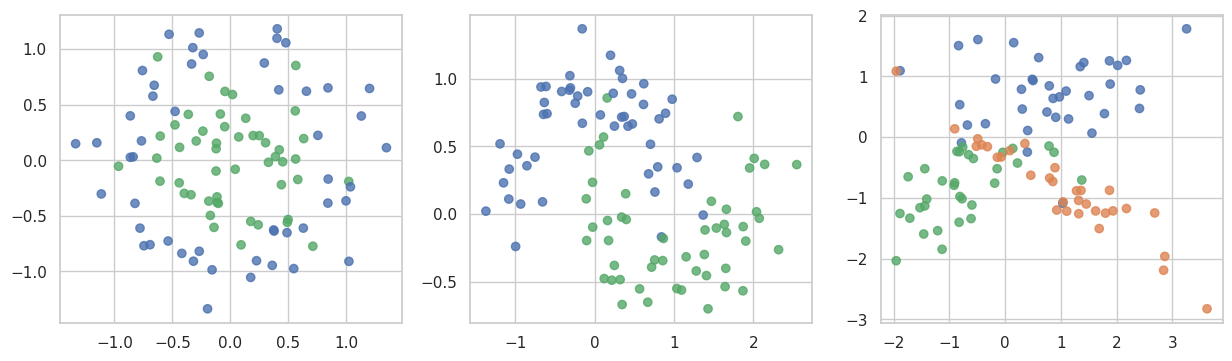

In [ ]:

plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

In [13]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

In [16]:
from itertools import product

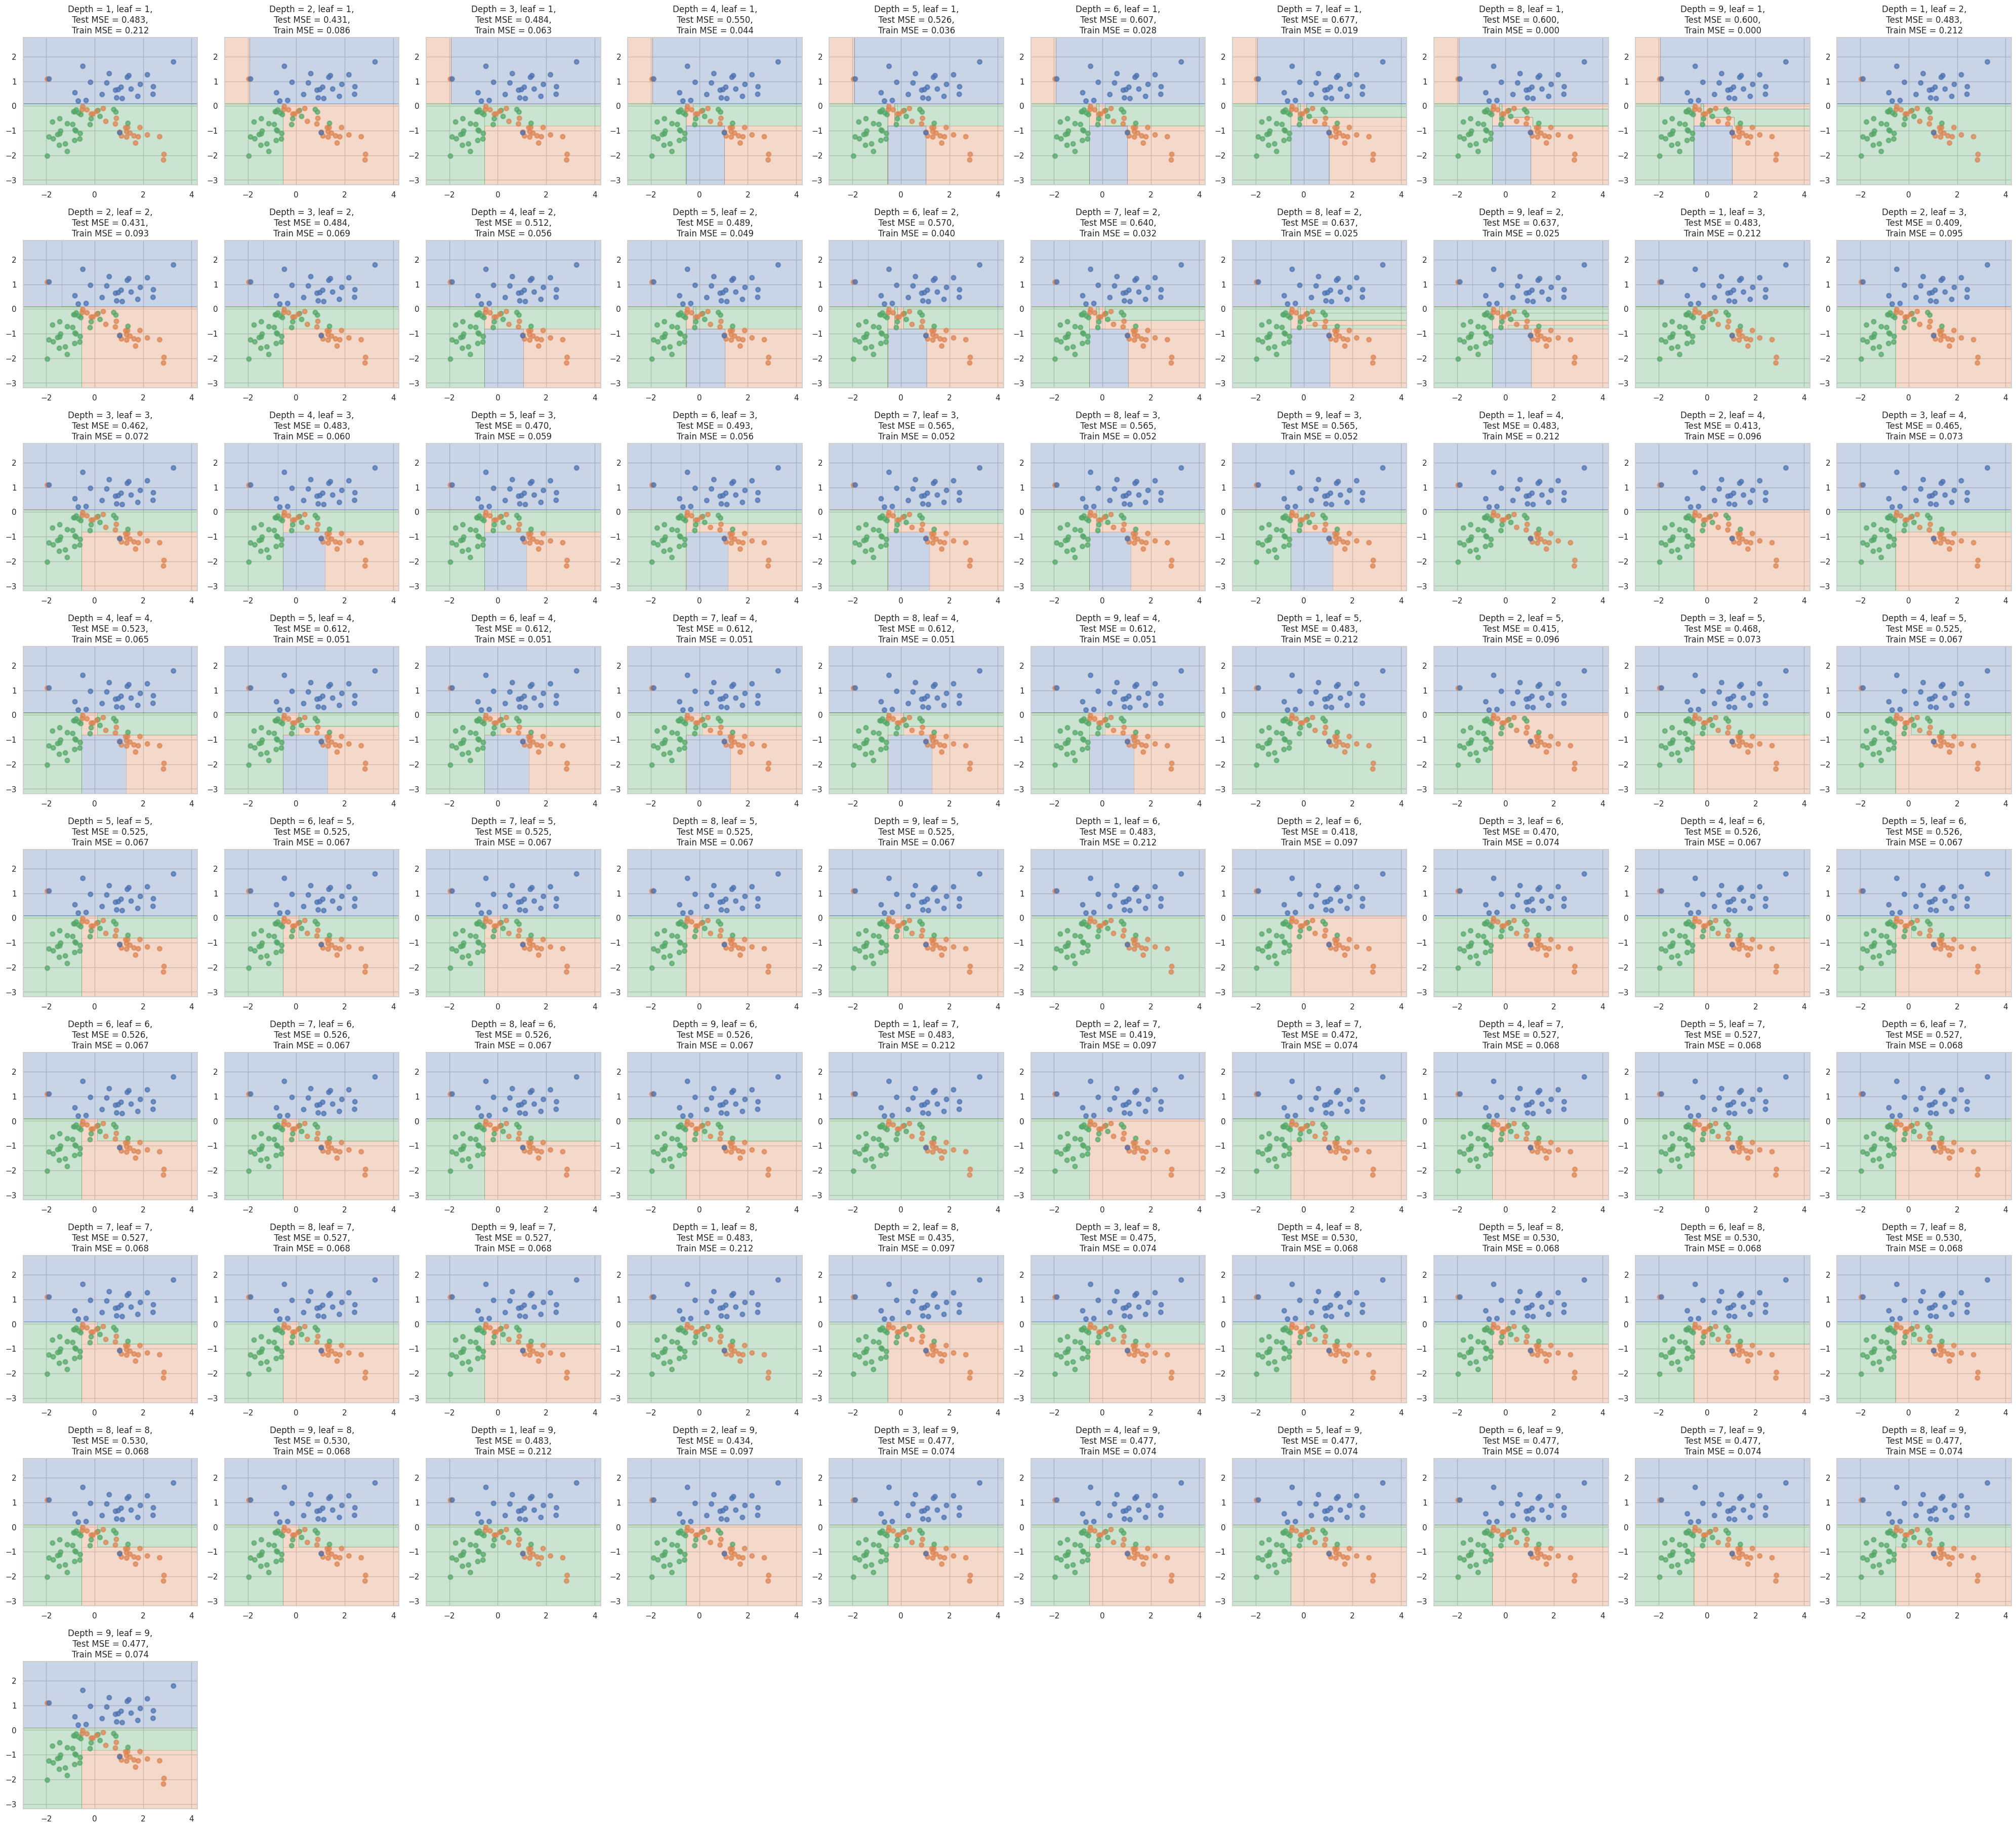

In [ ]:
plt.figure(figsize=(40,40))
X, y = datasets[2]
X_train, X_test, y_train, y_test = train_test_split(
                                      X,
                                      y,
                                      train_size =  0.8,
                                      random_state = 42
                                      )
for idx, (k, l) in enumerate(product(range(1, 10), repeat=2), 1):

    model = DecisionTreeRegressor(max_depth=l,
                                  min_samples_leaf=k,
                                  random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    plt.subplot(10, 10, idx)
    plot_surface(model, X_train, y_train)
    plt.title(f"Depth = {l}, leaf = {k},\n Test MSE = {mean_squared_error(y_test, y_pred):.3f}, \nTrain MSE = {mean_squared_error(y_train, y_train_pred):.3f}")
plt.tight_layout()
plt.show()

Для данного Dataset (№3) самым оптимальным будет использовать max_depth=2 min_sample_leafs=5 на такиз параметрах модель не переобучается и делает адекватные область под разбиение классов

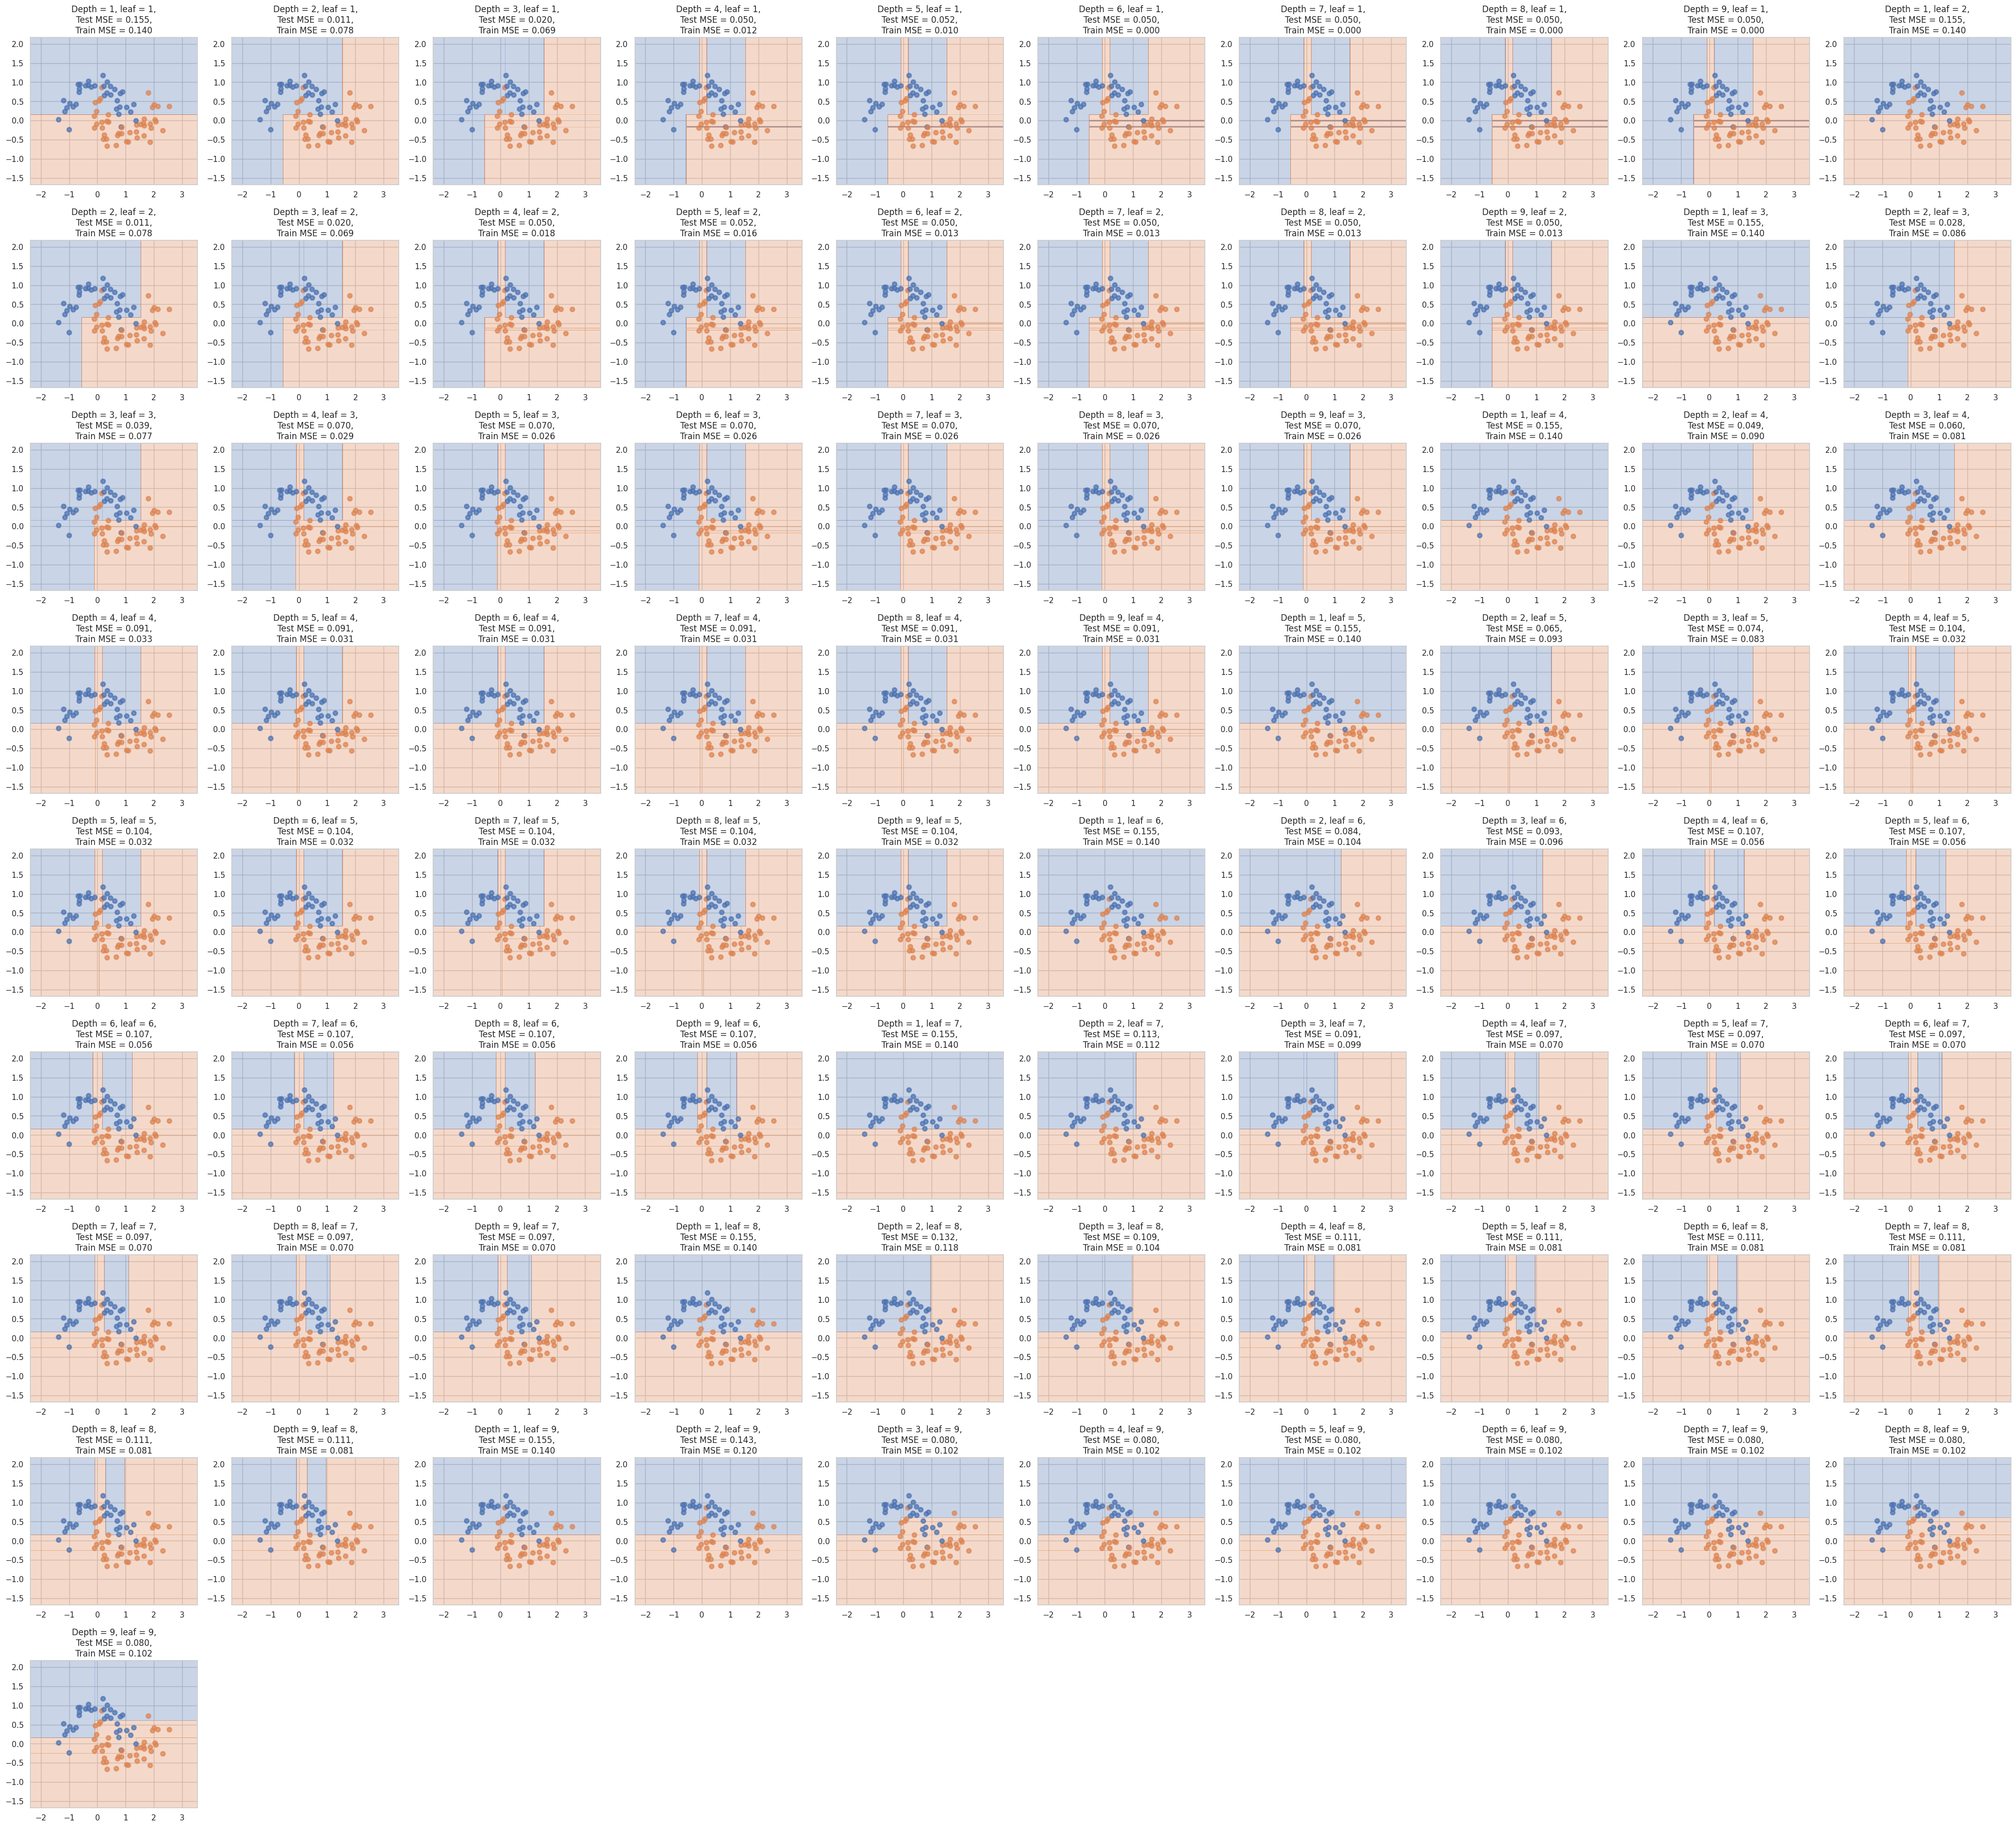

In [ ]:
plt.figure(figsize=(40,40))
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(
                                      X,
                                      y,
                                      train_size =  0.8,
                                      random_state = 42
                                      )
for idx, (k, l) in enumerate(product(range(1, 10), repeat=2), 1):

    model = DecisionTreeRegressor(max_depth=l,
                                  min_samples_leaf=k,
                                  random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    plt.subplot(10, 10, idx)
    plot_surface(model, X_train, y_train)
    plt.title(f"Depth = {l}, leaf = {k},\n Test MSE = {mean_squared_error(y_test, y_pred):.3f}, \nTrain MSE = {mean_squared_error(y_train, y_train_pred):.3f}")
plt.tight_layout()
plt.show()

Для данного Dataset (№2) самым оптимальным будет использовать max_depth=1 min_sample_leafs=4 на такиз параметрах модель не переобучается и делает адекватные область под разбиение классов

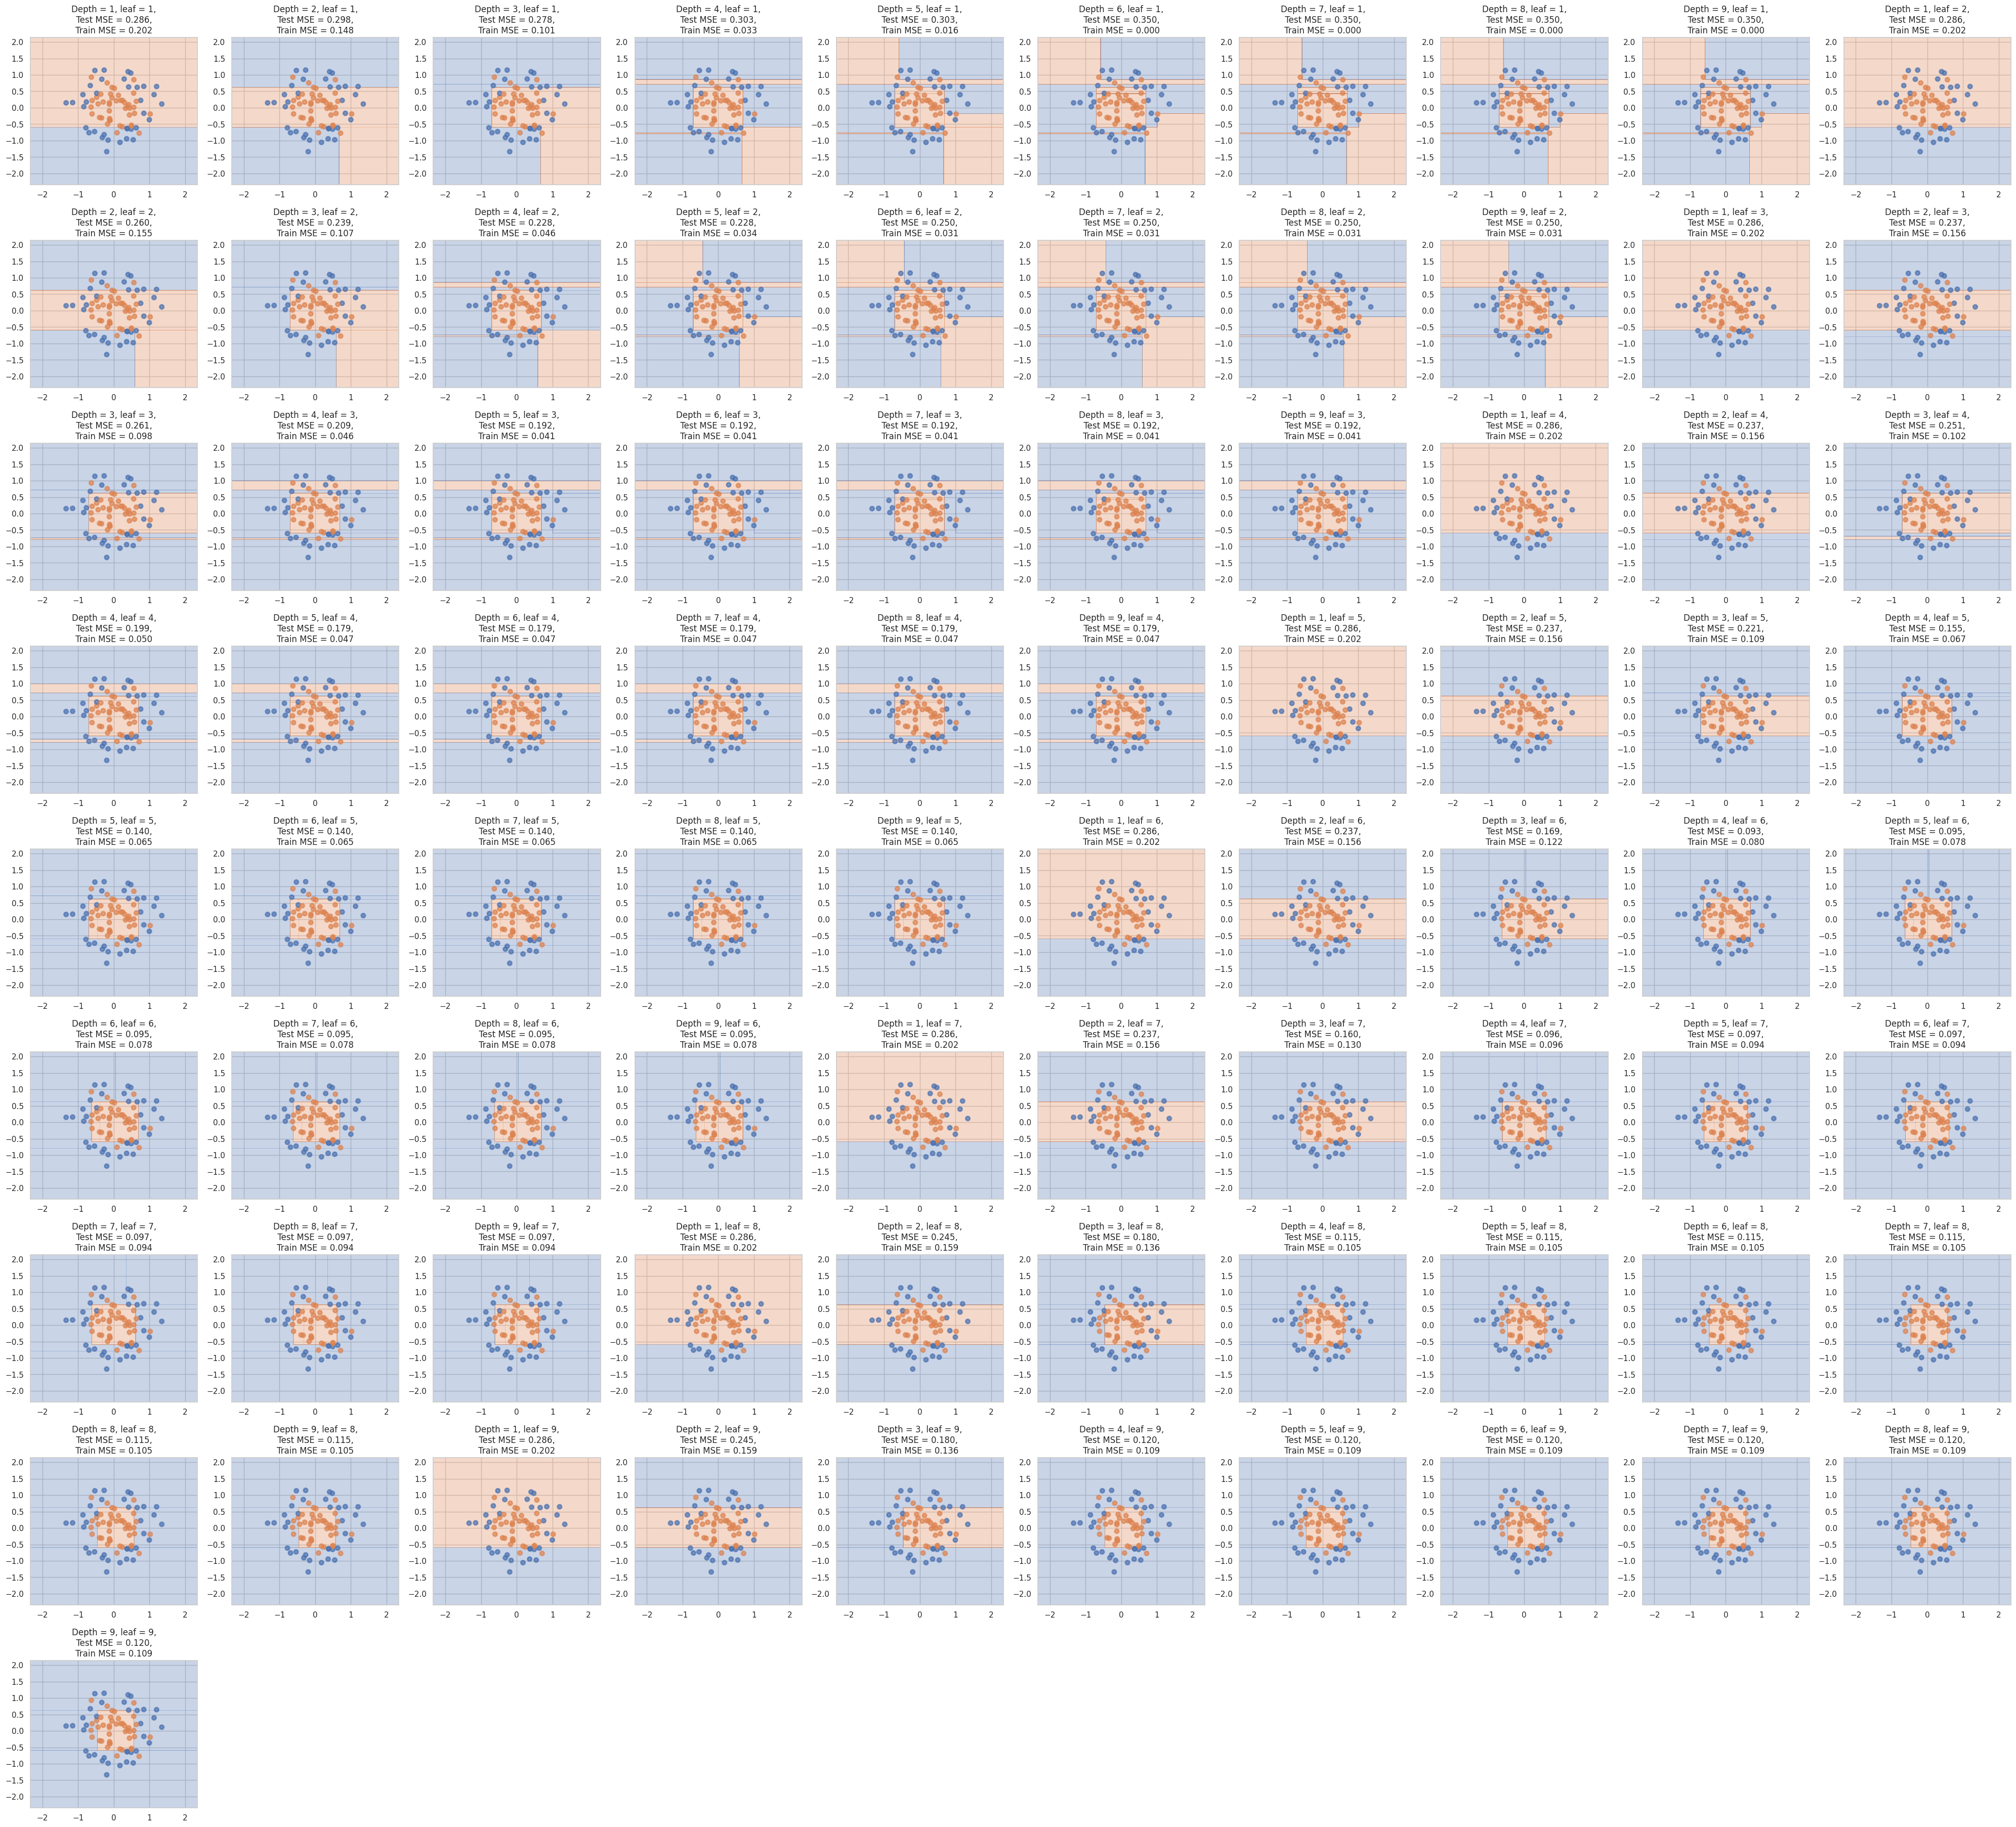

In [ ]:
plt.figure(figsize=(40,40))
X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(
                                      X,
                                      y,
                                      train_size =  0.8,
                                      random_state = 42
                                      )
for idx, (k, l) in enumerate(product(range(1, 10), repeat=2), 1):

    model = DecisionTreeRegressor(max_depth=l,
                                  min_samples_leaf=k,
                                  random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    plt.subplot(10, 10, idx)
    plot_surface(model, X_train, y_train)
    plt.title(f"Depth = {l}, leaf = {k},\n Test MSE = {mean_squared_error(y_test, y_pred):.3f}, \nTrain MSE = {mean_squared_error(y_train, y_train_pred):.3f}")
plt.tight_layout()
plt.show()

Для данного Dataset (№1) самым оптимальным будет использовать max_depth=2 min_sample_leafs=3 на такиз параметрах модель не переобучается и делает адекватные область под разбиение классов

На основании анализа результатов обучения модели можно сделать вывод о существовании определенных закономерностей в изменении качества модели в зависимости от её сложности. На ранних этапах наблюдается недообучение, когда модель недостаточно гибкая для адекватного представления сложных зависимостей в данных (например, разделяет сложную область на два упрощенных прямоугольника). По мере увеличения сложности модели (например, за счет увеличения глубины дерева или уменьшения минимального размера листа) качество улучшается, однако после достижения определенного уровня происходит переобучение. На этом этапе модель начинает подстраиваться под шумы данных, что приводит к усложнению структуры без значимого улучшения качества прогнозов.

Реализуем функцию find_best_split

In [17]:
import numpy as np
from collections import Counter


def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    feature_vector = np.array(feature_vector)
    target_vector = np.array(target_vector)

    # Пороги: среднее двух соседних значений
    thresholds = np.unique((np.sort(feature_vector)[1:] + np.sort(feature_vector)[:-1]) / 2)

    ginis = []

    # Для каждого порога вычисляем критери Джини
    for threshold in thresholds:

        left_mask = feature_vector < threshold
        right_mask = ~left_mask

        # Подмассивы классов для левой и правой подвыборки
        left_targ = target_vector[left_mask]
        right_targ = target_vector[right_mask]

        # Вычисление Джини для левой подвыборки
        left_p0 = np.sum(left_targ == 0) / len(left_targ)  # доля объектов класса 0
        left_p1 = 1 - left_p0  # доля объектов класса 1
        left_gini = 1 - left_p0**2 - left_p1**2

        # Вычисление Джини для правой подвыборки
        right_p0 = np.sum(right_targ == 0) / len(right_targ)
        right_p1 = 1 - right_p0
        right_gini = 1 - right_p0**2 - right_p1**2

        # Общий критерий Джини для порога
        gini = (len(left_targ) / len(feature_vector)) * left_gini + (len(right_targ) / len(feature_vector)) * right_gini
        ginis.append(gini)

    ginis = np.array(ginis)

    # Оптимальный порог и значение Джини
    threshold_best = thresholds[np.argmin(ginis)]
    gini_best = np.min(ginis)

    return thresholds, ginis, threshold_best, gini_best

class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node):
        if np.all(sub_y != sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_count / current_click
                sorted_categories = list(map(lambda x: x[1], sorted(ratio.items(), key=lambda x: x[1])))
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

                feature_vector = np.array(map(lambda x: categories_map[x], sub_X[:, feature]))
            else:
                raise ValueError

            if len(feature_vector) == 3:
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "Categorical":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[split], node["right_child"])

    def _predict_node(self, x, node):
      # Проверка, является ли узел терминальным
      if node["type"] == "terminal":
          return node["class"]

      # Если узел нетерминальный, переходим к разделению
      feature = node["feature_split"]
      feature_type = self._feature_types[feature]

      # Для реального признака
      if feature_type == "real":
          if x[feature] < node["threshold"]:
              return self._predict_node(x, node["left_child"])
          else:
              return self._predict_node(x, node["right_child"])

      # Для категориального признака
      elif feature_type == "categorical":
          if x[feature] in node["categories_split"]:
              return self._predict_node(x, node["left_child"])
          else:
              return self._predict_node(x, node["right_child"])

      else:
          raise ValueError(f"Unknown feature type: {feature_type}")

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

class LinearRegressionTree():
    def __init__(self, feature_types, base_model_type=None, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        pass

In [18]:
!wget  -O 'tic-tac-toe-endgame.csv' -q 'https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2024-fall/homework-practice/homework-practice-05-trees/tic-tac-toe-endgame.csv'
data = pd.read_csv("tic-tac-toe-endgame.csv")
df = pd.DataFrame(data)
df['V10'] = np.where(df['V10']=='positive', 1, 0)

Закодируем категориальные признаки с помощью LabelEncoder

In [19]:
from sklearn import preprocessing
cat = df.select_dtypes(include=['object']).columns
label = preprocessing.LabelEncoder()

for col in cat[:5]:
    df[col] = label.fit_transform(df[col])

In [121]:
Q = []
Tr = []
for i in range(5):
  thresholds, ginis, threshold_best, gini_best = find_best_split(df.iloc[:,i].to_list(),df.iloc[:,9].to_list())
  Q.extend(ginis)
  Tr.extend(thresholds)

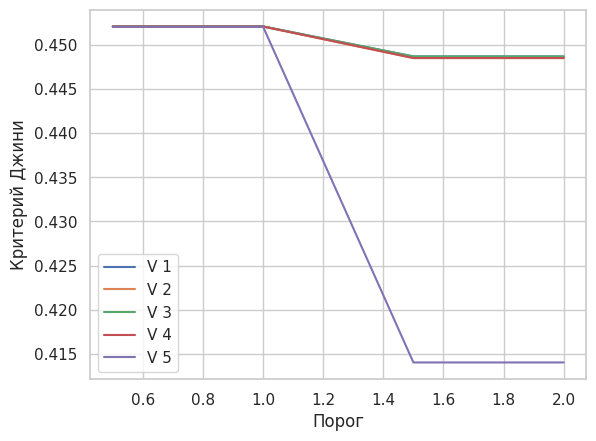

In [124]:
Q, Tr = np.array(Q), np.array(Tr)
Q, Tr = Q.reshape(5,-1), Tr.reshape(5,-1)
for i in range(5):
  plt.plot(Tr[i],Q[i], label=f'V {i+1}')
plt.ylabel('Критерий Джини')
plt.xlabel('Порог')
plt.legend()
plt.show()

Данные по столбцам V1...V4 малоразличимы по сравнению с V5 столбцом.
По критерию Джини лучшего всего разделяются данные В V5 на пороге [1.5
: 2.0]
Для данных V1..V4 можно сделать вывод, что порог по минимализации критерия Джини не существует или трудно достижим.

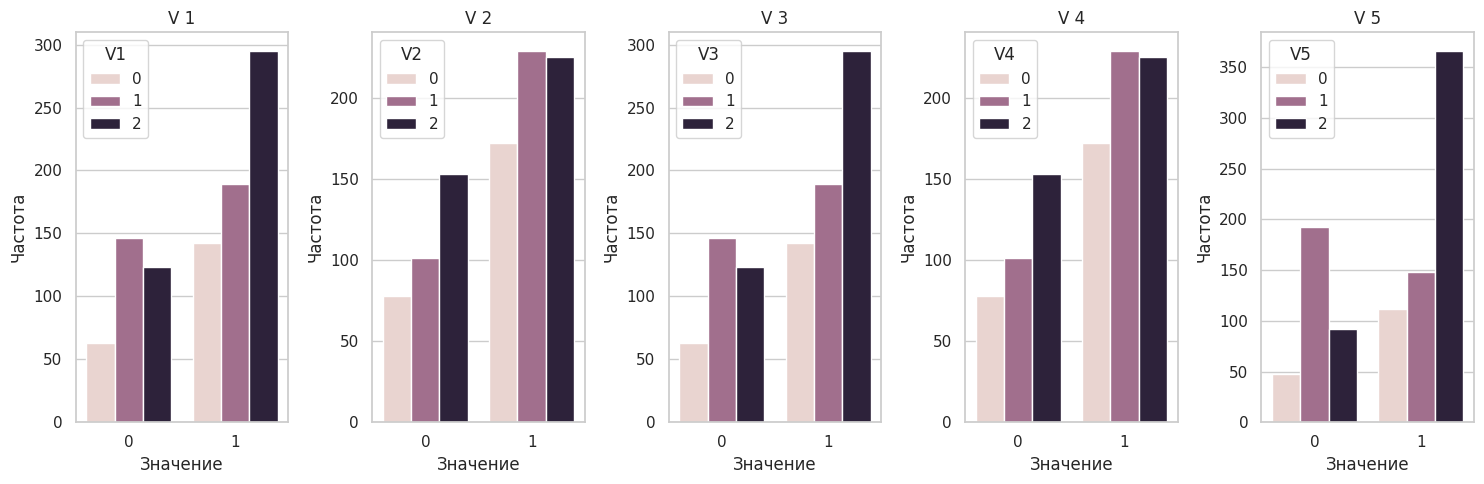

In [160]:
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    sns.countplot(x=df['V10'], hue=df.iloc[:, i], data=df)
    plt.title(f'V {i+1}')
    plt.ylabel('Частота')
    plt.xlabel('Значение')
plt.tight_layout()
plt.show()

Получили распредление значений по столбцам V1..V5 по target meaning (V10)
Особенно отличается распредление в V5 столбце, что наталкивает нас на вывод о корреляции данного результата с распределением по критерию Джини выше

In [4]:
!pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

In [33]:
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets

# variable information
df_x, df_y = pd.DataFrame(X), pd.DataFrame(y)
label = preprocessing.LabelEncoder()
df_x, df_y = df_x.apply(label.fit_transform), df_y.apply(label.fit_transform)

In [79]:
from sklearn.metrics import make_scorer,r2_score
from sklearn.model_selection import cross_val_score

Обучим модель дерева классификации с помощью кросс валидации

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:

for idx, (k, l) in enumerate(product(range(1, 10), repeat=2), 1):

    model = DecisionTreeClassifier(max_depth=k,
                                  min_samples_leaf=l,
                                  random_state=42)
    model.fit(X_train, y_train)
    scorer_accuracy = make_scorer(accuracy_score)
    cv_scores_accuracy = cross_val_score(model,
                                         df_x,
                                         df_y,
                                         cv=5,
                                         scoring=scorer_accuracy)
    print(f"Accuracy cross_valid: {cv_scores_accuracy.mean():.3f} "
          f"max_depth: {k}, min_samples_leaf: {l} ")

Accuracy cross_valid: 0.606 max_depth: 1, min_samples_leaf: 1 
Accuracy cross_valid: 0.606 max_depth: 1, min_samples_leaf: 2 
Accuracy cross_valid: 0.606 max_depth: 1, min_samples_leaf: 3 
Accuracy cross_valid: 0.606 max_depth: 1, min_samples_leaf: 4 
Accuracy cross_valid: 0.606 max_depth: 1, min_samples_leaf: 5 
Accuracy cross_valid: 0.606 max_depth: 1, min_samples_leaf: 6 
Accuracy cross_valid: 0.606 max_depth: 1, min_samples_leaf: 7 
Accuracy cross_valid: 0.606 max_depth: 1, min_samples_leaf: 8 
Accuracy cross_valid: 0.606 max_depth: 1, min_samples_leaf: 9 
Accuracy cross_valid: 0.895 max_depth: 2, min_samples_leaf: 1 
Accuracy cross_valid: 0.889 max_depth: 2, min_samples_leaf: 2 
Accuracy cross_valid: 0.889 max_depth: 2, min_samples_leaf: 3 
Accuracy cross_valid: 0.889 max_depth: 2, min_samples_leaf: 4 
Accuracy cross_valid: 0.889 max_depth: 2, min_samples_leaf: 5 
Accuracy cross_valid: 0.889 max_depth: 2, min_samples_leaf: 6 
Accuracy cross_valid: 0.889 max_depth: 2, min_samples_l

С учетом предоставленных данных можно сказать, что наиболее оптимальная модель будет на max_depth = 4 и min_sample_leafs=3, высокий покахатель r2 и модель непереобучена

Обучим модель задаче линейной регрессии с помощью DecisionTree

In [90]:

for idx, (k, l) in enumerate(product(range(1, 10), repeat=2), 1):

    model = DecisionTreeRegressor(max_depth=k,
                                  min_samples_leaf=l,
                                  random_state=42)
    score_mse = make_scorer(mean_squared_error, greater_is_better=False)
    scorer_r2 = make_scorer(r2_score)
    cv_scores_mse = cross_val_score(model, df_x, df_y, cv=10, scoring=scorer_mse)
    cv_scores_r2 = cross_val_score(model, df_x, df_y, cv=10, scoring=scorer_r2)
    print(f"MSE on cross_valid: {-cv_scores_mse.mean():.3f} (std: {cv_scores_mse.std():.3f})"
          f"R2 on cross_valid: {cv_scores_r2.mean():.3f} (std: {cv_scores_r2.std():.3f})"
          f"max_depth: {k}, min_samples_leaf: {l}")

MSE on cross_valid: 0.275 (std: 0.153)R2 on cross_valid: -1.316 (std: 1.602)max_depth: 1, min_samples_leaf: 1
MSE on cross_valid: 0.275 (std: 0.153)R2 on cross_valid: -1.316 (std: 1.602)max_depth: 1, min_samples_leaf: 2
MSE on cross_valid: 0.275 (std: 0.153)R2 on cross_valid: -1.316 (std: 1.602)max_depth: 1, min_samples_leaf: 3
MSE on cross_valid: 0.275 (std: 0.153)R2 on cross_valid: -1.316 (std: 1.602)max_depth: 1, min_samples_leaf: 4
MSE on cross_valid: 0.275 (std: 0.153)R2 on cross_valid: -1.316 (std: 1.602)max_depth: 1, min_samples_leaf: 5
MSE on cross_valid: 0.275 (std: 0.153)R2 on cross_valid: -1.316 (std: 1.602)max_depth: 1, min_samples_leaf: 6
MSE on cross_valid: 0.275 (std: 0.153)R2 on cross_valid: -1.316 (std: 1.602)max_depth: 1, min_samples_leaf: 7
MSE on cross_valid: 0.275 (std: 0.153)R2 on cross_valid: -1.316 (std: 1.602)max_depth: 1, min_samples_leaf: 8
MSE on cross_valid: 0.275 (std: 0.153)R2 on cross_valid: -1.316 (std: 1.602)max_depth: 1, min_samples_leaf: 9
MSE on cro

Основыаясь на результатах можно сказать, что max_depth = 4 и min_sample_leaf = 3 будет оптимальным в силу малого значения стандартного отклоения для r2 и MSE и при относительной несложности модели